In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [2]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [9]:
X_digits.shape

(1797, 64)

In [7]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
pd.DataFrame(search.cv_results_)

Best parameter (CV score=0.920):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 45}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.094553,0.017953,0.001647,0.000099,0.0001,5,"{'logistic__C': 0.0001, 'pca__n_components': 5}",0.780556,0.758333,0.802228,0.805014,0.746518,0.778530,0.023237,20
1,0.108800,0.009126,0.001567,0.000290,0.0001,15,"{'logistic__C': 0.0001, 'pca__n_components': 15}",0.897222,0.858333,0.896936,0.938719,0.849582,0.888158,0.031916,14
2,0.121451,0.012777,0.001566,0.000153,0.0001,30,"{'logistic__C': 0.0001, 'pca__n_components': 30}",0.905556,0.880556,0.910864,0.944290,0.857939,0.899841,0.029181,9
3,0.143365,0.018286,0.001895,0.000601,0.0001,45,"{'logistic__C': 0.0001, 'pca__n_components': 45}",0.905556,0.877778,0.908078,0.944290,0.863510,0.899842,0.027867,8
4,0.132792,0.019685,0.001926,0.000274,0.0001,64,"{'logistic__C': 0.0001, 'pca__n_components': 64}",0.905556,0.880556,0.908078,0.944290,0.863510,0.900398,0.027446,7
5,0.889347,0.260117,0.001615,0.000575,0.046416,5,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.838889,0.750000,0.844011,0.869081,0.818942,0.824184,0.040388,17
6,0.558777,0.096836,0.001361,0.000236,0.046416,15,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.930556,0.852778,0.924791,0.924791,0.888579,0.904299,0.029768,6
7,0.330108,0.014548,0.001580,0.000240,0.046416,30,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.922222,0.875000,0.933148,0.961003,0.899721,0.918219,0.029255,3
8,0.328464,0.035018,0.001797,0.000260,0.046416,45,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.925000,0.875000,0.941504,0.955432,0.902507,0.919889,0.028544,1
9,0.314695,0.035430,0.001841,0.000267,0.046416,64,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.925000,0.875000,0.938719,0.955432,0.905292,0.919889,0.027828,1


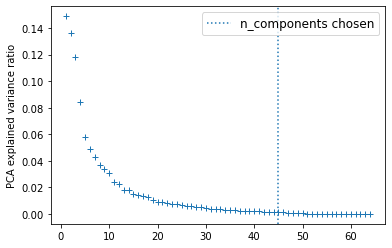

In [13]:
# Plot the PCA spectrum
pca.fit(X_digits)

fig, ax0 = plt.subplots(nrows=1, sharex=True)
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))


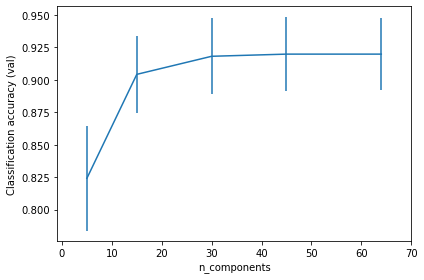

In [15]:
fig, ax1 = plt.subplots(nrows=1, sharex=True)
# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

In [17]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.094553,0.017953,0.001647,0.000099,0.0001,5,"{'logistic__C': 0.0001, 'pca__n_components': 5}",0.780556,0.758333,0.802228,0.805014,0.746518,0.778530,0.023237,20
1,0.108800,0.009126,0.001567,0.000290,0.0001,15,"{'logistic__C': 0.0001, 'pca__n_components': 15}",0.897222,0.858333,0.896936,0.938719,0.849582,0.888158,0.031916,14
2,0.121451,0.012777,0.001566,0.000153,0.0001,30,"{'logistic__C': 0.0001, 'pca__n_components': 30}",0.905556,0.880556,0.910864,0.944290,0.857939,0.899841,0.029181,9
3,0.143365,0.018286,0.001895,0.000601,0.0001,45,"{'logistic__C': 0.0001, 'pca__n_components': 45}",0.905556,0.877778,0.908078,0.944290,0.863510,0.899842,0.027867,8
4,0.132792,0.019685,0.001926,0.000274,0.0001,64,"{'logistic__C': 0.0001, 'pca__n_components': 64}",0.905556,0.880556,0.908078,0.944290,0.863510,0.900398,0.027446,7
5,0.889347,0.260117,0.001615,0.000575,0.046416,5,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.838889,0.750000,0.844011,0.869081,0.818942,0.824184,0.040388,17
6,0.558777,0.096836,0.001361,0.000236,0.046416,15,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.930556,0.852778,0.924791,0.924791,0.888579,0.904299,0.029768,6
7,0.330108,0.014548,0.001580,0.000240,0.046416,30,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.922222,0.875000,0.933148,0.961003,0.899721,0.918219,0.029255,3
8,0.328464,0.035018,0.001797,0.000260,0.046416,45,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.925000,0.875000,0.941504,0.955432,0.902507,0.919889,0.028544,1
9,0.314695,0.035430,0.001841,0.000267,0.046416,64,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.925000,0.875000,0.938719,0.955432,0.905292,0.919889,0.027828,1
